<a href="https://colab.research.google.com/github/Sowrya993/sowrya/blob/main/EmailSpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMAIL SPAM DETECTION USING PYTHON**

**IMPORTING THE NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**LOADING THE DATASET**

In [2]:
df=pd.read_csv('spamemail.csv',encoding="latin1")
print(df)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

**DISPLAYING THE COLUMNS PRESENT IN THE DATASET**

In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

**DISPLAYING THE FIRST 5 ROWS OF THE DATASET**

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


**DISPLAYING THE LAST 5 ROWS OF THE DATASET**

In [5]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


**DISPLAYING THE NUMBER OF ROWS AND COLUMNS PRESENT IN THE DATASET**

In [6]:
df.shape

(5171, 4)

INSIGHTS FOUND: There are 5171 rows and 4 columns.

**displaying the information of the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


INSIGHTS FOUND: There are 3 coumns where label and text with object datatype and label_num with int datatype

**CHECKING FOR NULL VALUES**

In [8]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

INSIGHTS FOUND:There are no null values in the dataset.

**CHECKING FOR DUPLICATE VALUES**

In [9]:
df.duplicated().sum()

0

INSIGHTS FOUND: There are no duplicate values.

**SEPERATING THE INPUT AND OUTPUT COLUMNS**

In [10]:
X = df['text']
y = df['label_num']

**SEPEARATING TRAINING AND TESTING DATA**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

**EXTRACTING THE FEATURES USING COUNTVECTORIZER**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

**TRAINING THE MODEL USING NAVIE BAYES CLASSIFIER**

In [15]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

**PREDICTING THE LABELS**

In [17]:
from sklearn import metrics
y_pred = classifier.predict(X_test)

**CALCULATING THE METRICS**

In [23]:
accuracy= metrics.accuracy_score(y_test, y_pred)
precision= metrics.precision_score(y_test, y_pred)
recall= metrics.recall_score(y_test, y_pred)
f1_score= metrics.f1_score(y_test, y_pred)
print("Accuracy:",accuracy*100)
print("Precision:",precision*100)
print("Recall:",recall*100)
print("F1 Score:",f1_score*100)

Accuracy: 97.97101449275362
Precision: 96.72727272727273
Recall: 95.68345323741008
F1 Score: 96.20253164556962


INSIGHTS FOUND:

Accuracy measures the overall correctness of the model's predictions.

Precision measures the proportion of correctly predicted positive samples (spam) out of all samples predicted as positive.

Recall measures the proportion of correctly predicted positive samples (spam) out of all actual positive samples.

Precision provides a balanced measure of both precision and recall, giving equal importance to false positives and false negatives.


**PLOTTING THE METRICS**

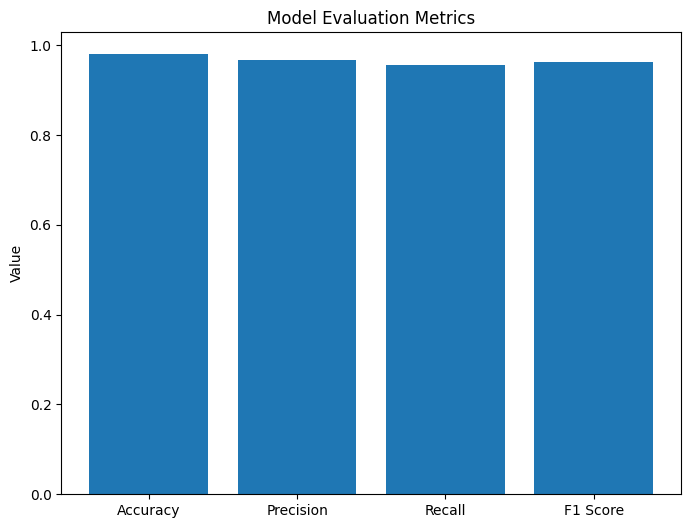

In [21]:
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(8, 6))
plt.bar(metrics_names, metrics_values)
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.show()

INSIGHTS FOUND: Through the above plot

1.we can compare the metrics.

2.we can evaluate the model performance.

3.we can identify the trade-off between precision and recall.

4.helps in accessing the stability of the model.

5.helps in model optimization.

**PREDICTING NEW MESSAGES INTO HAM AND SPAM**

In [29]:
messages = [
    "Hi there, just wanted to check if you received my previous email.",
    "Congratulations! You have won a free vacation. Click here to claim your prize."
]
messages_vectorized = vectorizer.transform(messages)
predictions = classifier.predict(messages_vectorized)

**PRINTING THE PREDICTIONS**

In [30]:
for message, prediction in zip(messages, predictions):
    print("Message:", message)
    print("Prediction:", prediction)
    print()


Message: Hi there, just wanted to check if you received my previous email.
Prediction: 0

Message: Congratulations! You have won a free vacation. Click here to claim your prize.
Prediction: 1

